In [4]:
import pandas as pd

dataset_path = '/media/mahfuz/Media/datasets/IMDB_movie_review/imdb_movie_review_dataset/IMDB_Dataset.csv'

In [5]:
data = pd.read_csv(dataset_path)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### EDA

In [6]:
from sklearn.model_selection import train_test_split 
X, y =data['review'].values, data['sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [7]:
print(f'Train data shape:, {x_train.shape}')
print(f'Train data shape:, {x_test.shape}')

Train data shape:, (37500,)
Train data shape:, (12500,)


In [11]:
dd = pd.Series(y_train).value_counts()
dd

negative    18750
positive    18750
Name: count, dtype: int64

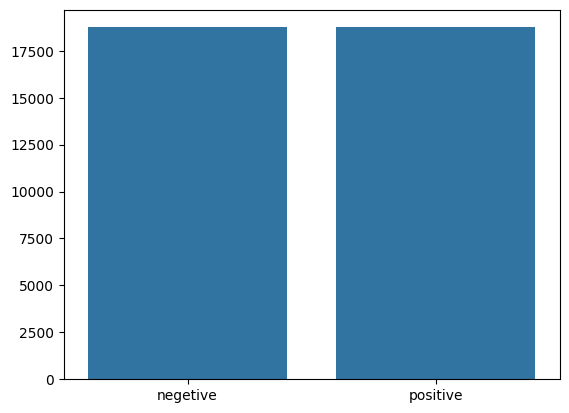

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.barplot(x=np.array(['negetive','positive']), y=dd.values)
plt.show()